In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz

In [2]:
def plot_space_time_flat(activity, field_pars):
    """
    Plots a flat space-time image of the field activity.
    """
    x_lim, t_lim, _, _, _ = field_pars

    x_range = [-x_lim, x_lim]
    t_range = [0.0, t_lim]

    upper_lim = activity.max()
    lower_lim = activity.min()

    plt.figure(figsize=(3, 2))
    pic = plt.imshow(np.transpose(activity), cmap='plasma', vmin=lower_lim, vmax=upper_lim,
                     extent=[t_range[0], t_range[1], x_range[0], x_range[1]],
                     interpolation='nearest', origin='lower', aspect='auto')
    plt.colorbar(pic)
    plt.xlabel('t')
    plt.ylabel('x', rotation=0)
    plt.title('u(x,t)')
    plt.tight_layout()
    plt.gcf().set_dpi(200)
    plt.show()

Here, I consider a model:

$$\tau_j \frac{du_j}{dt} = -u_j + \sum_{k}w_{jk}f(u_k),$$

where $f(u)$ is the Heaviside step function.

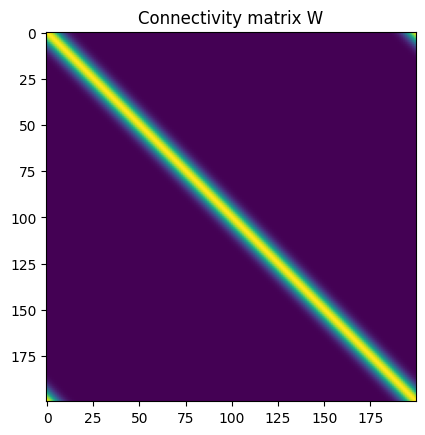

In [23]:
# Set parameters
x_lim, t_lim = 10, 100  # Limits for space and time. Space is set as [-x_lim, x_lim], time as [0, t_lim].

dx, dt = 0.1, 0.1  # Spatial and temporal discretization.

x = np.arange(-x_lim, x_lim, dx)
t = np.arange(0, t_lim, dt)

theta = 0.5
tau = 5

# Connectivity matrix
gauss = np.exp(-0.5 * np.square(x) / np.square(0.5)) - 0.2
g = np.concatenate([gauss[gauss.shape[0]//2:gauss.shape[0]], gauss[0:gauss.shape[0]//2]])
W = toeplitz(g, g)

plt.imshow(W)
plt.title('Connectivity matrix W')
plt.show()

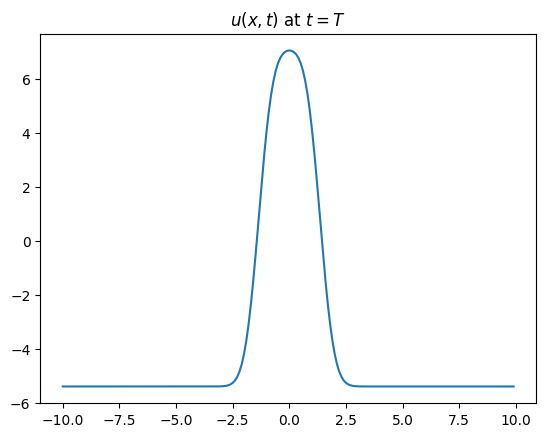

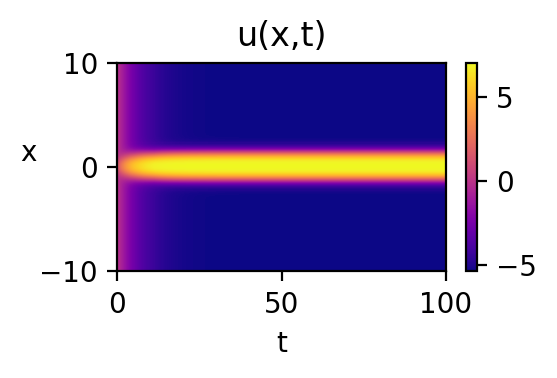

In [24]:
# Initial condition
A_0, sigma_0 = 1, 0.5

u_0 = A_0 * np.exp(-0.5 * (x) ** 2 / sigma_0 ** 2)
u_field = u_0

# Run simulation
history_u = np.zeros([len(t), len(x)])

for i in range(0, len(t)):
    sum = W.dot(np.heaviside(u_field - theta, 1))
    u_field = u_field + dt/tau * (-u_field + sum)
    history_u[i, :] = u_field

# Plot the result
plt.plot(x, u_field)
plt.title('$u(x,t)$ at $t=T$')
plt.show()

field_pars = [x_lim, t_lim, dx, dt, theta]
plot_space_time_flat(history_u, field_pars)

And now, with input:

$$\tau_j \frac{du_j}{dt} = -u_j + \sum_{k}w_{jk}f(u_k) + I_j.$$

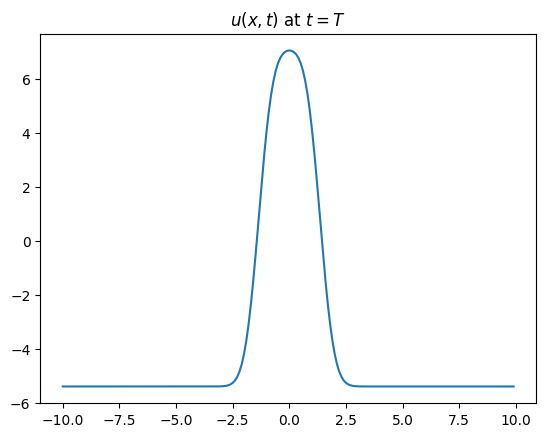

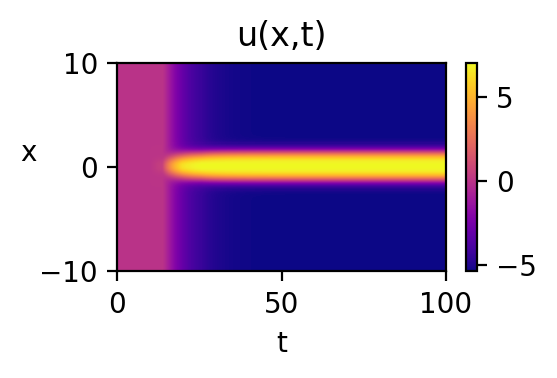

In [25]:
# Initial condition
u_0 = np.zeros([len(x)])
u_field = u_0

# Input
A_I, sigma_I = 1, 0.5
I = A_I * np.exp(-0.5 * (x) ** 2 / sigma_I ** 2)

# Run simulation
history_u = np.zeros([len(t), len(x)])
Input = []

for i in range(0, len(t)):
  Input = I if ((i > len(t)//10) and (i < len(t)//5)) else 0

  sum = W.dot(np.heaviside(u_field - theta, 1))
  u_field = u_field + dt/tau * (-u_field + sum + Input)
  history_u[i, :] = u_field

# Plot the result
plt.plot(x, u_field)
plt.title('$u(x,t)$ at $t=T$')
plt.show()

field_pars = [x_lim, t_lim, dx, dt, theta]
plot_space_time_flat(history_u, field_pars)